# Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading DataSet

In [4]:
df=pd.read_csv("D:\ExcelR Data Science\Assignments\MultiLinearRegression\ToyotaCorolla.csv",encoding='latin1')
df.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


# Data Insights

In [5]:
df.dtypes

Id                   int64
Model               object
Price                int64
Age_08_04            int64
Mfg_Month            int64
Mfg_Year             int64
KM                   int64
Fuel_Type           object
HP                   int64
Met_Color            int64
Color               object
Automatic            int64
cc                   int64
Doors                int64
Cylinders            int64
Gears                int64
Quarterly_Tax        int64
Weight               int64
Mfr_Guarantee        int64
BOVAG_Guarantee      int64
Guarantee_Period     int64
ABS                  int64
Airbag_1             int64
Airbag_2             int64
Airco                int64
Automatic_airco      int64
Boardcomputer        int64
CD_Player            int64
Central_Lock         int64
Powered_Windows      int64
Power_Steering       int64
Radio                int64
Mistlamps            int64
Sport_Model          int64
Backseat_Divider     int64
Metallic_Rim         int64
Radio_cassette       int64
T

In [6]:
df.shape

(1436, 38)

In [7]:
df.isnull().values.any()

False

In [8]:
df.isna().values.any()

False

In [9]:
df[df.duplicated()]

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar


# Assigning Values for Categories Fuel Type and Color

In [10]:
from sklearn.preprocessing import LabelEncoder
  

label_encoder =LabelEncoder()
df['Fuel_Type']= label_encoder.fit_transform(df['Fuel_Type'])
df['Color']= label_encoder.fit_transform(df['Color'])

In [11]:
df['Fuel_Type'].unique()

array([1, 2, 0])

In [12]:
df['Color'].unique()

array([2, 6, 1, 8, 4, 5, 3, 9, 7, 0])

# Summary Statistics

In [13]:
df.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,1.868384,101.502089,0.674791,3.513928,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,0.371572,14.981080,0.468616,1.701142,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,0.000000,69.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,2.000000,90.000000,0.000000,2.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,2.000000,110.000000,1.000000,4.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,2.000000,110.000000,1.000000,5.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,2.000000,192.000000,1.000000,9.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# Dropping few features which is not required
#Drop Id,Model
# Drop Cylinders which has ConstantValue
df1=df.drop(['Id',"Model",'Cylinders'],axis=1)


In [15]:
df1.shape

(1436, 35)

# Data Visualization

In [16]:
#sns.pairplot(data=df1)

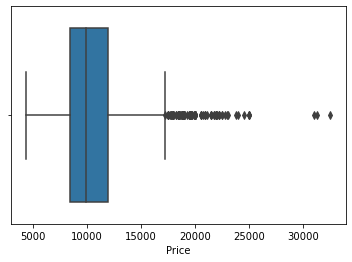

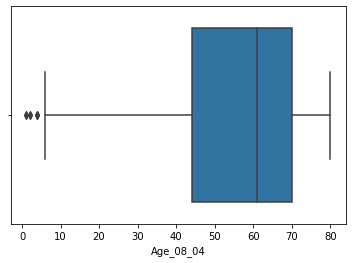

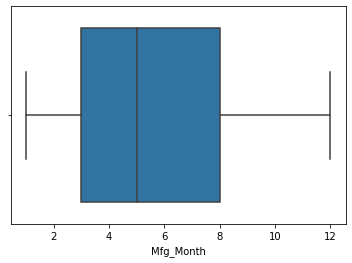

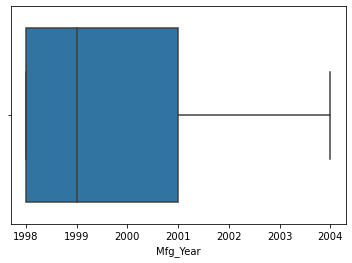

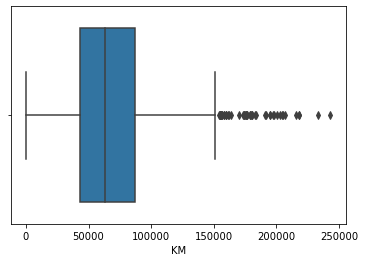

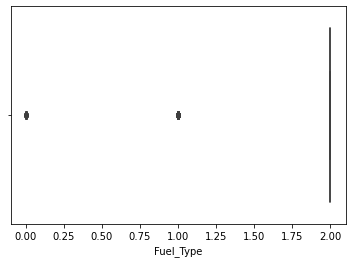

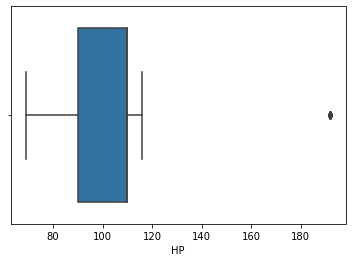

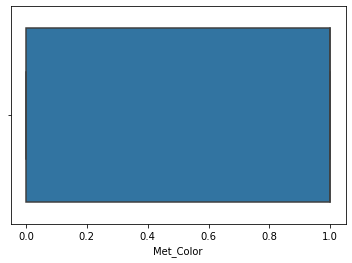

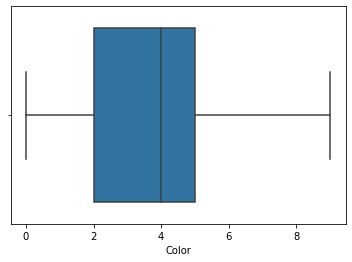

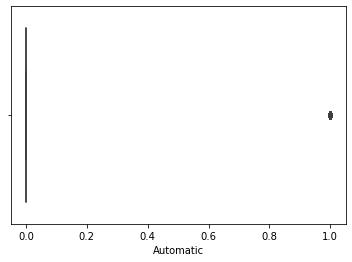

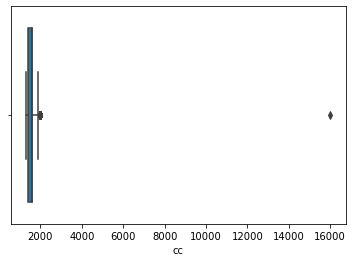

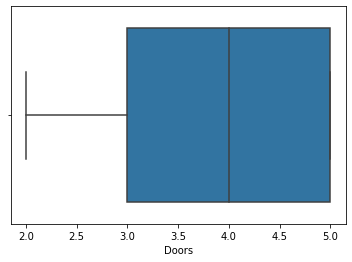

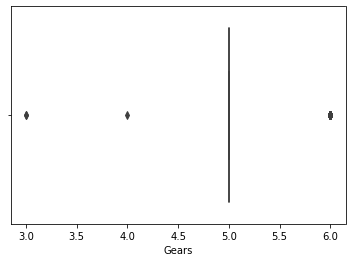

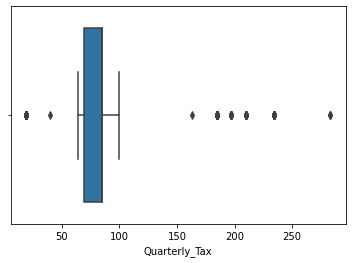

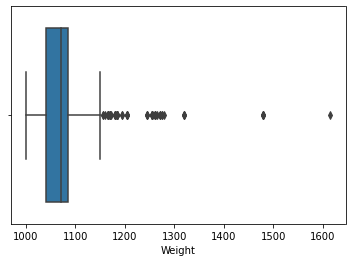

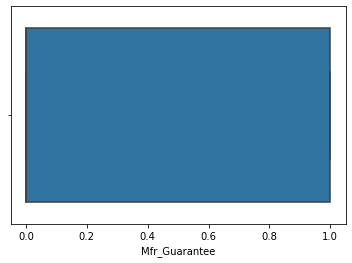

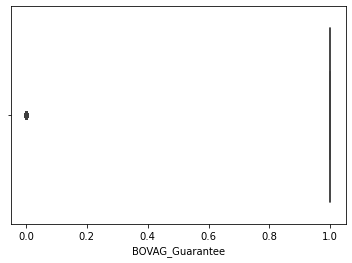

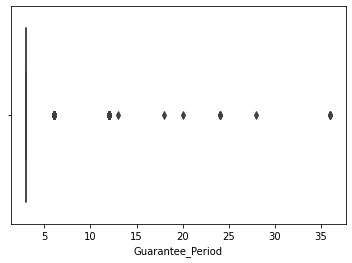

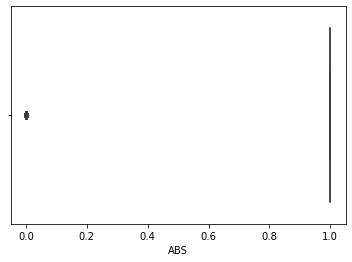

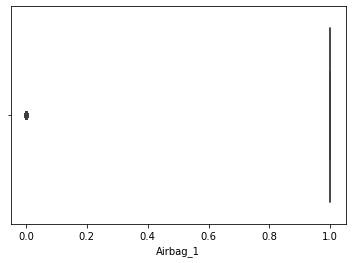

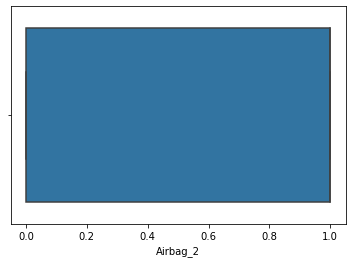

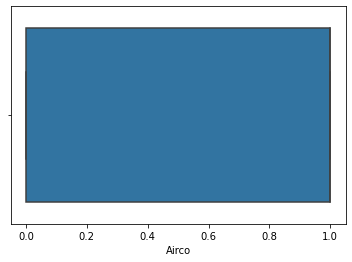

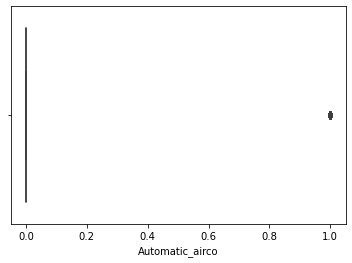

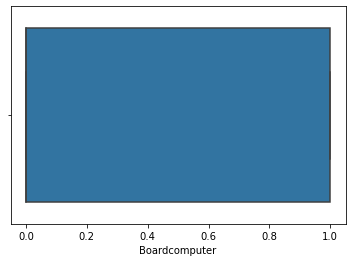

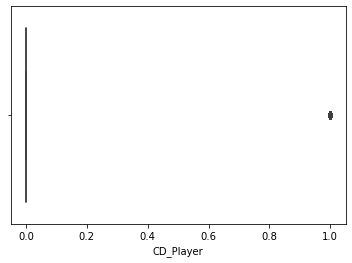

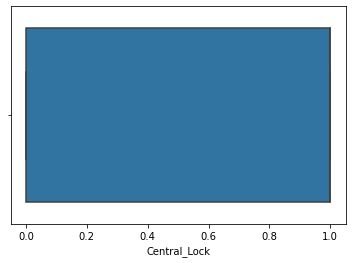

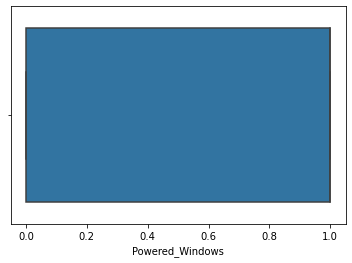

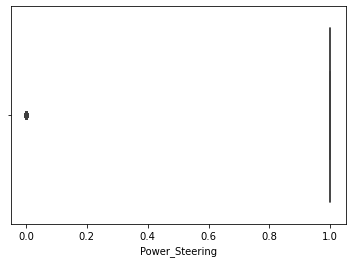

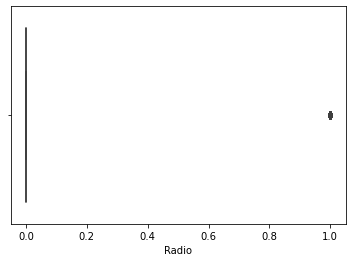

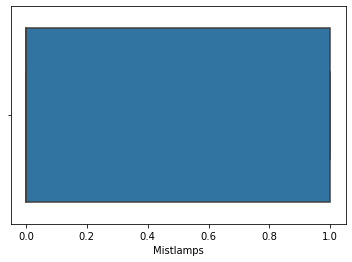

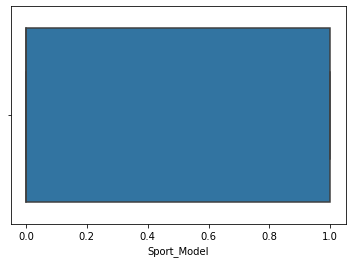

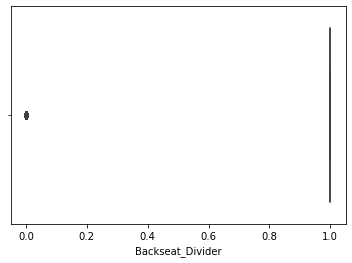

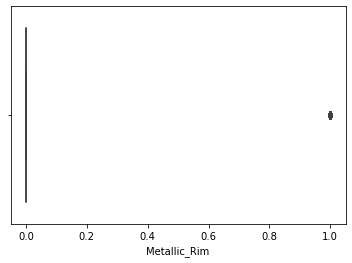

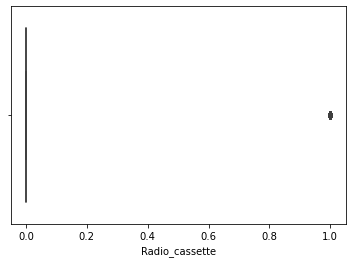

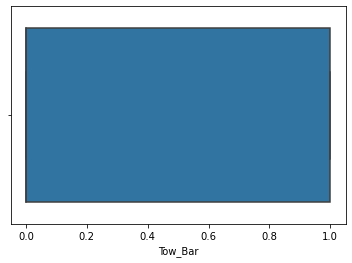

In [17]:
for i in df1.columns:
    sns.boxplot(x=df1[i],orient="h",dodge=True)
    plt.xlabel(i)
    plt.show()
  


In [18]:
#sns.displot(df1)

# Calculating Multicollinearity

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["features"]=df1.columns
vif["vif_Factor"] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
vif

,features,vif_Factor
0,Price,10.973480
1,Age_08_04,89.500144
2,Mfg_Month,4.353147
3,Mfg_Year,2357.747844
4,KM,2.339577
5,Fuel_Type,4.341614
6,HP,1.763367
7,Met_Color,1.174998
8,Color,1.097991
9,Automatic,1.089080


In [20]:
corr=df1.corr()

corr.style.background_gradient(cmap='coolwarm')
#sns.heatmap(data=cols.corr(),ann)

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,cc,Doors,Gears,Quarterly_Tax,Weight,Mfr_Guarantee,BOVAG_Guarantee,Guarantee_Period,ABS,Airbag_1,Airbag_2,Airco,Automatic_airco,Boardcomputer,CD_Player,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
Price,1.000000,-0.876590,-0.018138,0.885159,-0.569960,-0.022157,0.314990,0.108905,-0.051590,0.033081,0.126389,0.185326,0.063104,0.219197,0.581198,0.197802,0.028133,0.146627,0.306138,0.093588,0.248974,0.429259,0.588262,0.601292,0.481374,0.343458,0.356518,0.064275,-0.041887,0.222083,0.164121,0.102569,0.108564,-0.043179,-0.172369
Age_08_04,-0.876590,1.000000,-0.123255,-0.983661,0.505672,0.080261,-0.156622,-0.108150,0.029712,0.031717,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253,-0.164658,0.006865,-0.152563,-0.412887,-0.105406,-0.329017,-0.403600,-0.426259,-0.719449,-0.510895,-0.279631,-0.283856,-0.069192,0.013791,-0.126895,-0.110988,-0.116751,-0.040045,0.012857,0.188720
Mfg_Month,-0.018138,-0.123255,1.000000,-0.057416,-0.020630,-0.043774,-0.039312,0.030266,-0.035049,0.009146,0.037387,-0.012069,-0.013063,0.031373,-0.002167,-0.005771,-0.003863,0.029010,0.072532,0.003756,0.076749,0.057088,-0.049017,0.017715,-0.016736,0.010055,0.025185,-0.055495,0.031601,-0.033504,0.052789,0.023245,0.023506,0.032576,-0.042170
Mfg_Year,0.885159,-0.983661,-0.057416,1.000000,-0.504974,-0.072803,0.164697,0.103310,-0.023532,-0.033567,0.091892,0.151442,0.007766,0.193934,0.473478,0.166697,-0.006206,0.148218,0.402215,0.105359,0.317075,0.395674,0.437718,0.720567,0.517008,0.279490,0.280996,0.079676,-0.019607,0.133737,0.102080,0.113237,0.036022,-0.018844,-0.182206
KM,-0.569960,0.505672,-0.020630,-0.504974,1.000000,-0.420586,-0.333538,-0.080503,0.038198,-0.081854,0.102683,-0.036197,0.015023,0.278165,-0.028598,-0.212851,0.001438,-0.138942,-0.177203,-0.018012,-0.139275,-0.133057,-0.258221,-0.353862,-0.266826,-0.125177,-0.156242,0.007397,0.013661,-0.074327,-0.044784,-0.045658,-0.013599,0.015770,0.084153
Fuel_Type,-0.022157,0.080261,-0.043774,-0.072803,-0.420586,1.000000,0.409476,-0.001859,-0.058285,0.069718,-0.277239,-0.026935,0.069655,-0.798395,-0.505303,0.134928,0.056747,0.060493,-0.010937,0.016380,-0.005793,-0.037203,-0.027135,-0.017794,-0.021194,0.040401,0.080161,-0.028092,-0.007220,0.079659,0.043877,0.060458,0.040399,-0.007934,0.027266
HP,0.314990,-0.156622,-0.039312,0.164697,-0.333538,0.409476,1.000000,0.058712,-0.018910,0.013144,0.035856,0.092424,0.209477,-0.298432,0.089614,0.140026,0.022701,0.076163,0.057832,0.025137,0.017644,0.241134,0.244957,0.129715,0.102300,0.250122,0.265593,0.048850,0.020998,0.210571,-0.006027,0.010908,0.206784,0.019919,0.068271
Met_Color,0.108905,-0.108150,0.030266,0.103310,-0.080503,-0.001859,0.058712,1.000000,-0.167835,-0.019335,0.031812,0.085243,0.018601,0.011326,0.057929,0.154850,0.010783,0.009295,0.022298,0.100055,0.038416,0.114190,0.027977,0.089886,0.198220,0.153307,0.145147,0.086544,0.072756,0.023821,0.003779,0.037741,0.053829,0.071530,0.148536
Color,-0.051590,0.029712,-0.035049,-0.023532,0.038198,-0.058285,-0.018910,-0.167835,1.000000,0.010509,-0.003254,0.080551,-0.088073,0.029189,-0.002422,-0.029305,-0.017286,0.054717,0.017587,-0.061765,-0.058971,-0.037816,-0.057915,-0.066828,-0.067739,-0.075589,-0.076544,-0.020958,0.063828,-0.134614,-0.084437,-0.124984,-0.095493,0.068035,0.023717
Automatic,0.033081,0.031717,0.009146,-0.033567,-0.081854,0.069718,0.013144,-0.019335,0.010509,1.000000,0.066740,-0.027654,-0.098555,-0.055371,0.057249,0.026194,0.023393,-0.002256,-0.016128,-0.011895,0.001171,-0.028353,0.059057,-0.037069,-0.010967,-0.002502,-0.005864,-0.004469,-0.014600,0.003077,0.013175,-0.018876,-0.078095,-0.014150,0.018786


# Standarded Data

In [21]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
Car_std = std.fit_transform(df1)
Car_std = pd.DataFrame(Car_std, columns = df1.columns)

In [22]:
Car_std.head()

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,Automatic,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,0.763763,-1.771966,1.327576,1.541796,-0.574695,-2.337868,-0.768042,0.694219,-0.890258,-0.242893,...,0.850817,0.882853,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293
1,0.832715,-1.771966,1.327576,1.541796,0.117454,-2.337868,-0.768042,0.694219,1.461923,-0.242893,...,0.850817,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293
2,0.887877,-1.718184,1.029329,1.541796,-0.715386,-2.337868,-0.768042,0.694219,-0.890258,-0.242893,...,-1.175341,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293
3,1.163685,-1.610620,0.432833,1.541796,-0.547650,-2.337868,-0.768042,-1.440467,-1.478303,-0.242893,...,-1.175341,-1.132691,0.15097,-0.41387,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293
4,0.832715,-1.395491,-0.760158,1.541796,-0.801028,-2.337868,-0.768042,-1.440467,-1.478303,-0.242893,...,0.850817,0.882853,0.15097,-0.41387,1.700470,-0.654871,0.546235,-0.507388,-0.412716,-0.620293


LINEAR REGRESSION

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error

In [58]:
x1=Car_std.iloc[:,2:36]
y1=Car_std["Price"]
#x1.columns

In [59]:

x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.25,random_state=45)
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [60]:
y1_pred=regressor.predict(x_test)

In [61]:

print("R2_score:",r2_score(y1_pred,y_test)*100)
print("Mean_Squared_Error:",mean_squared_error(y1_pred,y_test))
print("Mean_Absolute_Error:",mean_absolute_error(y1_pred,y_test))
print("Root__Mean_Squared_Error:",np.sqrt(mean_squared_error(y1_pred,y_test)))

R2_score: 91.38464486472205
Mean_Squared_Error: 0.08686243671880015
Mean_Absolute_Error: 0.21645351963543022
Root__Mean_Squared_Error: 0.2947243402211635


C:\Users\anilr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


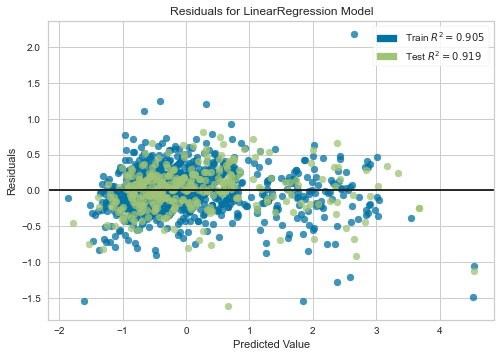

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [62]:
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(regressor,hist=False)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

C:\Users\anilr\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


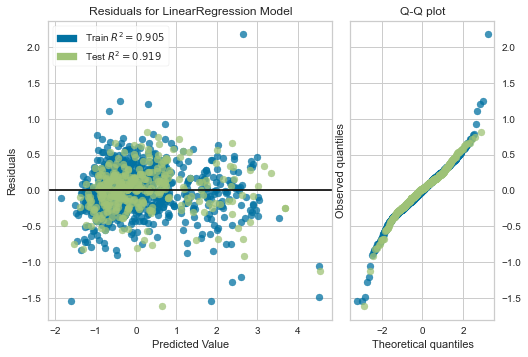

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [63]:
visualizer = ResidualsPlot(regressor,hist=False,qqplot=True)
visualizer.fit(x_train, y_train)  # Fit the training data to the visualizer
visualizer.score(x_test, y_test)  # Evaluate the model on the test data
visualizer.show() 

# Model Deletion Diagnostics (checking Outliers or Influencers)
    #Two Techniques : 1. Cook's Distance & 2. Leverage value

CooksDistance(ax=<AxesSubplot:>)

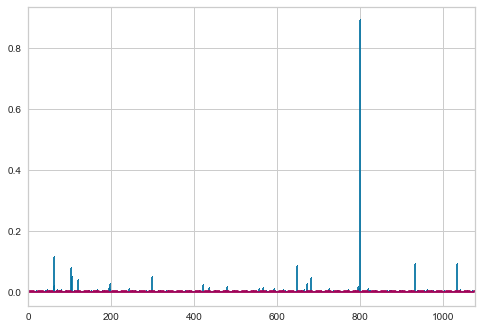

In [64]:
from yellowbrick.regressor import CooksDistance
visualizer1=CooksDistance()
visualizer1.fit(x_train, y_train)
#cooks_distance(x_train, y_train,
    #draw_threshold=True,
    #linefmt="C0-", markerfmt=","


In [65]:
Car_std['Distance'] = visualizer1.distance_
Car_std.sort_values('Distance', ascending = False).head()

,index,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Distance
220,221,0.474164,-0.642540,-1.356653,0.892524,0.150393,0.354336,0.567440,0.694219,-1.478303,...,0.882853,0.150970,-0.413870,-0.588073,-0.654871,0.546235,-0.507388,-0.412716,-0.620293,0.891271
959,960,-0.369811,0.540668,-0.760158,-0.406021,-0.472810,0.354336,-1.035138,-1.440467,-0.302213,...,-1.132691,-6.623821,-0.413870,-0.588073,-0.654871,-1.830714,-0.507388,-0.412716,-0.620293,0.115687
235,236,0.060451,-0.642540,-1.356653,0.892524,-0.214258,0.354336,0.567440,-1.440467,0.873878,...,-1.132691,-6.623821,-0.413870,-0.588073,-0.654871,-1.830714,-0.507388,2.422976,-0.620293,0.093836
505,506,0.336259,-0.158500,-0.461910,0.243251,-0.347615,0.354336,0.567440,0.694219,-0.890258,...,0.882853,0.150970,2.416215,1.700470,-0.654871,-1.830714,-0.507388,-0.412716,1.612141,0.093588
108,109,6.004128,-2.793828,-0.163662,2.840341,-1.827849,-2.337868,0.968085,-1.440467,0.285833,...,0.882853,0.150970,-0.413870,1.700470,1.527019,0.546235,-0.507388,-0.412716,-0.620293,0.086179


In [66]:
Car_std.shape

(1435, 37)

In [67]:
Car_std=Car_std.drop(Car_std.index[[80]],axis=0).reset_index()


In [77]:
Car_std.shape

(1434, 38)

In [82]:
x2=Car_std.iloc[:,3:37]

#x1.columns
y2=Car_std['Price']

In [83]:
x_train,x_test,y_train,y_test=train_test_split(x2,y2,test_size=0.25,random_state=45)
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [84]:
y2_pred=regressor.predict(x_test)

In [85]:
print("R2_score:",r2_score(y2_pred,y_test)*100)
print("Mean_Squared_Error:",mean_squared_error(y2_pred,y_test))
print("Mean_Absolute_Error:",mean_absolute_error(y2_pred,y_test))
print("Root__Mean_Squared_Error:",np.sqrt(mean_squared_error(y2_pred,y_test)))

R2_score: 90.17873886740566
Mean_Squared_Error: 0.09380452929242587
Mean_Absolute_Error: 0.22801881861871964
Root__Mean_Squared_Error: 0.30627525086501173


# Linear Regression 3

In [86]:
#selecting the features based correlation

data=df1[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [87]:
x=data.iloc[:,1:9]


In [88]:
y=data["Price"]


In [89]:

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)
regressor=LinearRegression()
regressor.fit(x_train,y_train)


LinearRegression()

In [90]:
print("X_train:",x_train.shape)
print("X_test:",x_test.shape)
print("Y_train:",y_train.shape)
print("Y_test:",y_test.shape)

X_train: (1077, 8)
X_test: (359, 8)
Y_train: (1077,)
Y_test: (359,)


In [91]:
y_pred=regressor.predict(x_test)
y_pred.shape

(359,)

In [ ]:
y_test

Ploting results

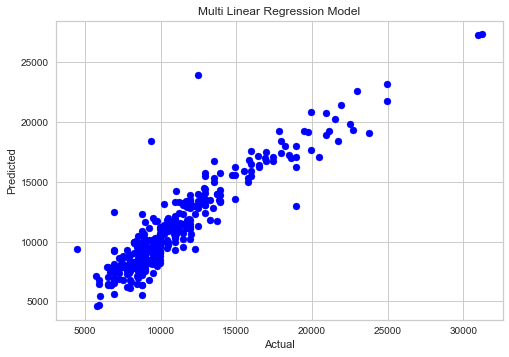

In [92]:
plt.title("Multi Linear Regression Model")

plt.scatter(y_test,y_pred,color='blue');
plt.xlabel('Actual');
plt.ylabel('Predicted');
#plt.plot(y_test,y_pred,color="red")



<AxesSubplot:xlabel='Price'>

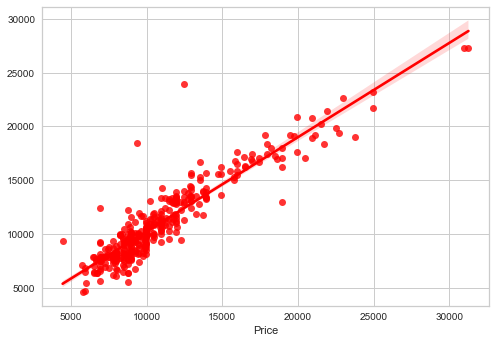

In [93]:
sns.regplot(x=y_test,y=y_pred,color='red')

In [94]:
df = pd.DataFrame(data={'Predicted value':y_pred,'Actual Value':y_test})
df

,Predicted value,Actual Value
1166,8021.161543,7950
167,18926.587237,20950
629,8739.377369,7750
653,9056.975599,9950
1429,8511.955988,8950
...,...,...
1272,9534.870950,8450
6,16968.873459,16900
1234,7734.119004,8950
127,16370.920103,16500


In [95]:



print("R2_score:",r2_score(y_pred,y_test)*100)
print("Mean_Squared_Errr:",mean_squared_error(y_pred,y_test)*100)
print("Mean_Absolute_Error:",mean_absolute_error(y_pred,y_test)*100)
print("Root__Mean_Squared_Error:",np.sqrt(mean_squared_error(y_pred,y_test)))

R2_score: 83.49294113462648
Mean_Squared_Errr: 233139751.2964469
Mean_Absolute_Error: 103486.91617035354
Root__Mean_Squared_Error: 1526.8914542181672
